In [1]:
import torch
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
import os
import seaborn as sns
import pickle
import pandas as pd
from sklearn.decomposition import PCA

In [2]:
def norm(matrix):
    return (matrix - matrix.mean(axis=0)) / (matrix.std(axis=0)+1e-9)
def load_pretrained_emb_weight(model,dataset):
    if model =='sasrec':
        path = os.path.join('saved',model,dataset, 'pretrain.pth')
    else :
        path = os.path.join('saved',model,dataset, 'ml10.pth')
    # path = path_dict[dataset_name]
    saved = torch.load(path, map_location='cpu',weights_only=False)
    pretrained_emb_weight = saved['item_embedding.weight']
    return norm(pretrained_emb_weight.detach().numpy()[1:])

In [3]:
def get_emb_all(dataset):
    model_list = ['adrec', 'sasrec', 'diffurec', 'dreamrec']
    emb_list = []
    for model in model_list:
        emb_list.append(load_pretrained_emb_weight(model, dataset))
    emb_list.append(norm(np.random.normal(size=emb_list[0].shape))[1:])
    print(emb_list[0].shape)
    model_list.append('gaussian')
    return emb_list, model_list

In [4]:
 def get_tsne_all(emb_list):
    tsne_list=[]
    # pca = PCA(n_components=2) 
    for emb in emb_list:
        # emb = pca.fit_transform(emb)
        tsne_list.append(TSNE(n_components=2, random_state=2024,init='pca').fit_transform(emb))
    print('tsne done!')
    return tsne_list

In [5]:
def draw_three(data,model_name,data_name,vmax=60,l=40,save=False):
    sns.set_context("paper")
    # sns.set_style("dark", {"axes.facecolor": ".3"})
    sns.set_style("dark")
    plt.subplots(figsize=(5, 5))
    sns.despine(left=True, bottom=True)
    plt.xticks([])
    plt.yticks([])
    plt.xlim(-1*l,l)
    plt.ylim(-1*l,l)
    cbar = sns.cubehelix_palette(start=2.7, light=1, as_cmap=True)
    # cbar = sns.color_palette("mako", as_cmap=True)
    # sns.scatterplot(x=data[:,0], y=data[:,1], s=3, color=".3",edgecolors='none')
    sns.histplot(x=data[:,0], y=data[:,1], bins=30, pthresh=.0,stat="percent", cmap=cbar,cbar=False)
    sns.kdeplot(x=data[:,0], y=data[:,1],levels=5, color=".6", linewidths=1)
    # sns.kdeplot(x=data[:,0], y=data[:,1],cmap=cbar, fill=True, thresh=0, levels=15, cut=100,)
    # sns.color_palette("mako", as_cmap=True)
    if not os.path.exists(f'../imgs/tsne/{data_name}'):
        os.makedirs(f'../imgs/tsne/{data_name}')
    if save:
        plt.savefig(f'../imgs/tsne/{data_name}/tSNE_map_{model_name}_{l}.svg', dpi=300,bbox_inches='tight')
    plt.show()
    plt.close()

In [15]:
def draw_all(tsne_list, model_list,data_name,l,save=False):
    l_list = [l,0.5*l,0.1*l,0.1*l,0.4*l]
    for i in range(len(tsne_list)):
        # draw_three(tsne_list[i],model_list[i],data_name=data_name,l=l_list[0])
        draw_three(tsne_list[i],model_list[i],data_name=data_name,l=l_list[i],save=save)

In [13]:
data_name= 'beauty'
emb_list,model_list = get_emb_all(dataset=data_name)
tsne_list = get_tsne_all(emb_list)

(6086, 128)
tsne done!


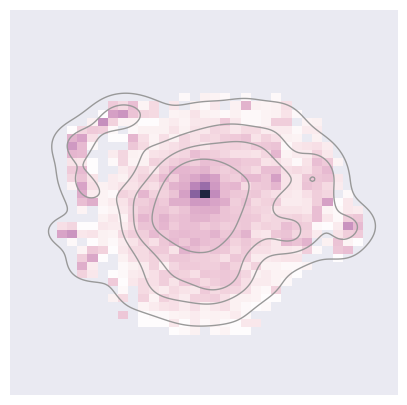

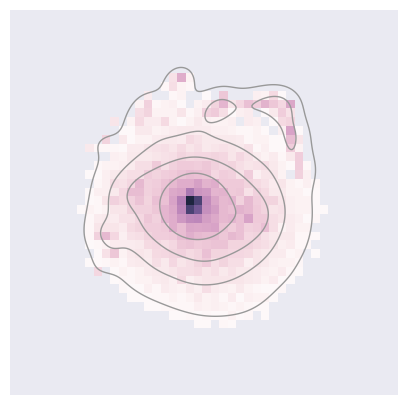

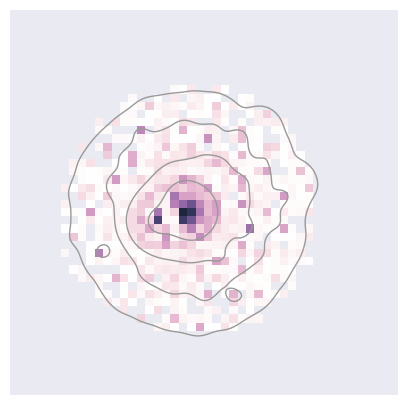

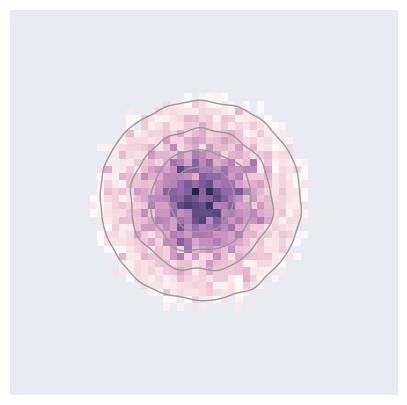

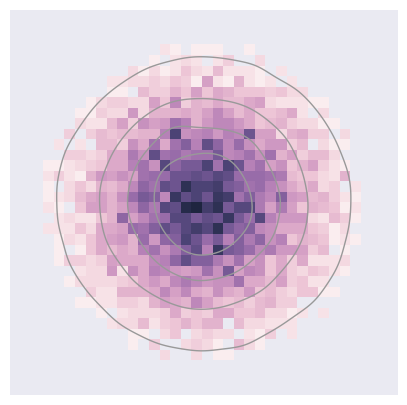

In [18]:
# draw_all(tsne_list, model_list,data_name=data_name, l=80)
draw_all(tsne_list, model_list,data_name=data_name, l=80,save=True)

In [9]:
    # data_merge = pd.DataFrame({
#     'x_sasrec': sasrec_2d[:, 0],  # 第一个数据集的x轴坐标
#     'y_sasrec': sasrec_2d[:, 1],  # 第一个数据集的y轴坐标
#     'x_adrec': adrec_2d[:, 0],    # 第二个数据集的x轴坐标
#     'y_adrec': adrec_2d[:, 1],     # 第二个数据集的y轴坐标
#     'x_diffurec': diffurec_2d[:, 0],  
#     'y_diffurec': diffurec_2d[:, 1],
#     'x_dreamrec': dreamrec_2d[:, 0],   
#     'y_dreamrec': dreamrec_2d[:, 1]     
# })

In [10]:
# colors = sns.color_palette("Set2", len(adrec_2d)*2)  # Set2 是一个比较适合分类数据的颜色调色板
# def match_class(tsne_emb,colors=colors[:len(adrec_2d)]):
#     path = os.path.join('../datasets','data','ml-100k', 'item_class.pkl')
#     with open(path, 'rb') as f:
#         item_class = pickle.load(f)
#     
#     for i, label in enumerate(item_class.columns[1:]):
#         # 找到属于该标签的所有 item_id
#         category_indices = item_class[item_class[label] == 1].index
#         # 绘制这些 item_id 的 t-SNE 结果，使用不同的颜色
#         plt.scatter(tsne_emb[category_indices, 0], tsne_emb[category_indices, 1], 
#                 label=label, color=colors[i], s=2,alpha=0.5)

In [11]:

# sns.set_theme(style="ticks")
# sns.set_context("paper")
# 
# fig, ax = plt.subplots(2,2,figsize=(6, 6),constrained_layout=True,)
# plt.title("t-SNE visualization of Embedding Layer Weights")
# plt.xlabel("t-SNE Dimension 1")
# plt.ylabel("t-SNE Dimension 2")
# colors = sns.color_palette("Set2", as_cmap=True)
# plt.subplot(2, 2, 1)
# # plt.scatter(emb_sasrec[:, 0], emb_sasrec[:, 1],c=np.arange(sasrec_2d.shape[0]), s=3, alpha=0.5)
# plt.scatter(sasrec_2d[:, 0], sasrec_2d[:, 1], s=3, alpha=0.5,edgecolors='none',color='#4e8397')
# # g=sns.jointplot(x=sasrec_2d[:,0], y=sasrec_2d[:,1],kind="reg", color='#4e8397',line_kws=dict(color="r"),scatter_kws=dict(alpha=0.5))
# # 设置边缘的 KDE 图
# # sns.kdeplot(data_merge['x_sasrec'], ax=g.ax_marg_x, color='#845ec2', fill=True, alpha=0.5,bw_adjust=1)
# # g_hex.plot_marginals(sns.kdeplot, color='#4e8397')
# # match_class(sasrec_2d)
# # axesSub.set_title('SASRec')
# plt.subplot(2, 2, 2)
# plt.scatter(adrec_2d[:, 0], adrec_2d[:, 1], s=3, alpha=0.5,edgecolors='none',color='#845ec2')
# # axesSub =sns.jointplot(x=adrec_2d[:,0], y=adrec_2d[:,1], data=data_merge, kind='hist', color='#845ec2',line_kws=dict(color="r"),scatter_kws=dict(alpha=0.5))
# # axesSub.set_title('ADRec')
# # plt.scatter(emb_adrec[:, 0], emb_adrec[:, 1],c=np.arange(adrec_2d.shape[0]), s=3, alpha=0.5)
# # match_class(adrec_2d)
# plt.legend(['adrec'])
# 
# plt.subplot(2, 2, 3)
# plt.scatter(diffurec_2d[:, 0], diffurec_2d[:, 1], s=3, alpha=0.5,edgecolors='none',color='#845ec2')
# plt.subplot(2, 2, 4)
# plt.scatter(gaussian_2d[:, 0], gaussian_2d[:, 1], s=3, alpha=0.5,edgecolors='none',color='#845ec2')
# # plt.scatter(dreamrec_2d[:, 0], dreamrec_2d[:, 1], s=3, alpha=0.5,edgecolors='none',color='#845ec2')
# # sns.scatterplot(x=sasrec_2d[:, 0], y=sasrec_2d[:, 1], s=5, alpha=1,edgecolors='none',color='#4e8397')
# # sns.scatterplot(x=adrec_2d[:, 0], y=adrec_2d[:, 1], s=5, alpha=0.8,edgecolors='none',color='#845ec2')
# # 绘制第一个数据集的散点图和核密度估计
# # g = sns.jointplot(x='x_sasrec', y='y_sasrec', data=data_merge, kind='scatter', color='#4e8397')
# 
# # 添加第二个数据集的散点图
# # sns.kdeplot(x=data_merge['x_adrec'], y=data_merge['y_adrec'], ax=g.ax_joint, color='#845ec2', fill=False, alpha=0.5)
# 
# # 绘制第二个数据集的边缘密度图
# # sns.kdeplot(data_merge['x_adrec'], ax=g.ax_marg_x, color='#845ec2', fill=True, alpha=0.5,bw_adjust=1)
# # sns.kdeplot(data_merge['y_adrec'], ax=g.ax_marg_y, color='#845ec2', fill=True, alpha=0.5)
# # # match_class(sasrec_2d)
# # match_class(adrec_2d,colors=colors[len(adrec_2d):])
# # 连接对应点 A 和 B
# # for i in range(sasrec_2d.shape[0]):
# #     sns.lineplot(x=[sasrec_2d[i, 0], adrec_2d[i, 0]], y=[sasrec_2d[i, 1], adrec_2d[i, 1]],alpha=0.1,linewidth=0.1,color='#b0a8b9')  # 用黑色线连接对应的点
# 
# # plt.colorbar()  # 显示颜色条，表示索引的值
# # plt.savefig(f'../imgs/tSNE_map_{dataset}.pdf', dpi=300)
# plt.show()
# plt.close()